<a href="https://colab.research.google.com/github/Swara-24/Explainable-AI/blob/main/Colab3(Error_metrics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/drive')
#loading data
data = pd.read_csv('/drive/My Drive/Colab Notebooks/data_banknote_authentication.txt')
data.head(5)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Data Set Information:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. 

Attribute Information:
1. variance of Wavelet Transformed image 
2. skewness of Wavelet Transformed image
3. curtosis of Wavelet Transformed image 
4. entropy of image
5. class (integer)

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error

In [ ]:
#function for plotting confusion_matrix
def plot_confusion_matrix(predict_y,test_y):
    C = confusion_matrix(test_y, predict_y)
    labels = ['Authentic','Not Authentic']
    plt.figure(figsize=(10,7))
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
#function for plotting roc curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
features=['Variance','Skewness','Kurtosis','Entropy']
X=data[features]
y=data.Class
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
# Specify Model
model = DecisionTreeClassifier(random_state=1)
# Fit Model
model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Make validation predictions
val_predictions = model.predict(val_X)

## ROC AUC SCORE

In [ ]:
#calculate roc auc score
auc = roc_auc_score(val_y, val_predictions)
print('AUC: ')
print(auc)

AUC: 
0.9922279792746114


The higher the AUC score, the better is the performance.
Here, it is 0.99 which means that the prediction is almost perfect.

## ROC CURVE

In [ ]:
fpr, tpr, thresholds = roc_curve(val_y, val_predictions)

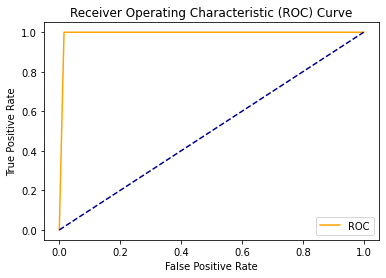

In [ ]:
plot_roc_curve(fpr, tpr)

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).
The above curve implies that the prediction is very accurate as there are very less values that are predicted incorrectly.

## CONFUSION MATRIX

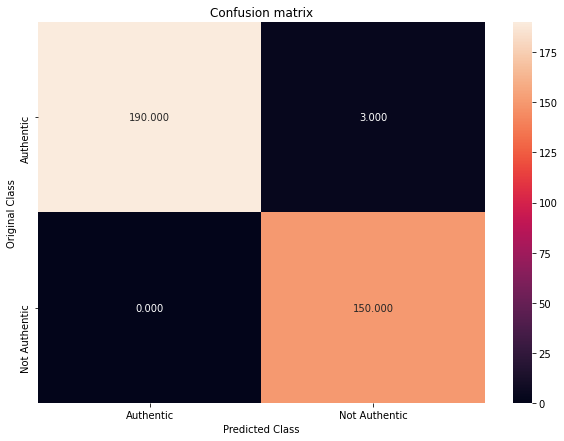

In [ ]:
plot_confusion_matrix(val_predictions,val_y)

The confusion matrix shows that:

1. There are 190 values that are AUTHENTIC originally, and are predicted AUTHENTIC.
2. There are 3 values that are AUTHENTIC actually, but are predicted NOT AUTHENTIC.
3. There are no values that are NON AUTHENTIC which are predicted NON AUTHENTIC.
4. There are 150 values which are NOT AUTHENTIC and are predicted NON AUTHENTIC.

## MEAN ABSOLUTE ERROR

In [ ]:
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: ")
print(val_mae)

Validation MAE: 
0.008746355685131196


## ROOT MEAN SQUARE ERROR

In [ ]:
val_rmse = mean_squared_error(val_predictions, val_y)
print("Validation RMSE: ")
print(val_rmse)

Validation RMSE: 
0.008746355685131196
